In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 9]
import scipy.optimize as opt
import numpy as np
import math
from io import StringIO

In [2]:
def modellfunktion(t, U_0, tau):
    return U_0 * np.exp(-t / tau)

In [3]:
datafile = StringIO(\
'''
# 100k 100n
# time [s]   voltage [V]
0.000   4.976
0.002   3.969
0.004   3.177
0.006   2.546
0.008   2.048
0.010   1.647
0.012   1.329
0.014   1.061
0.016   0.860
0.019   0.694
0.021   0.552
0.023   0.445
0.025   0.357
0.027   0.288
0.029   0.230
0.031   0.186
0.034   0.147
0.036   0.117
0.038   0.093
0.040   0.073
0.042   0.059
0.045   0.044
0.047   0.034
0.049   0.024
0.051   0.024
0.053   0.015
0.055   0.010
0.057   0.005
0.059   0.005
0.061   0.000
''')

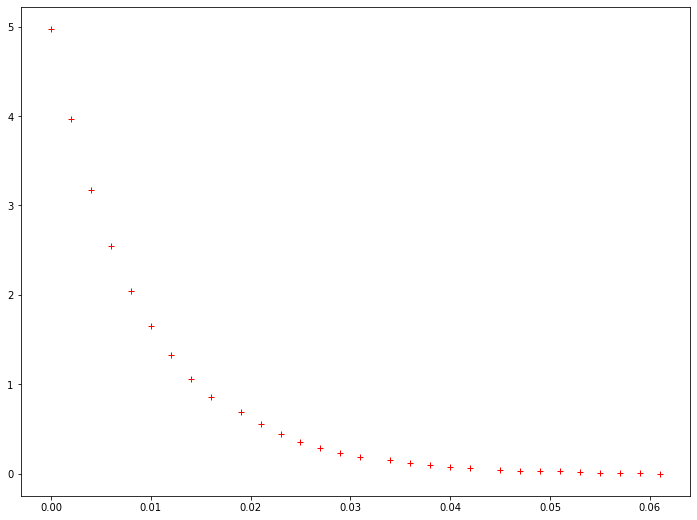

In [4]:
t, U = np.loadtxt(datafile, unpack=True)
plt.plot(t,U,"r+")
plt.show()

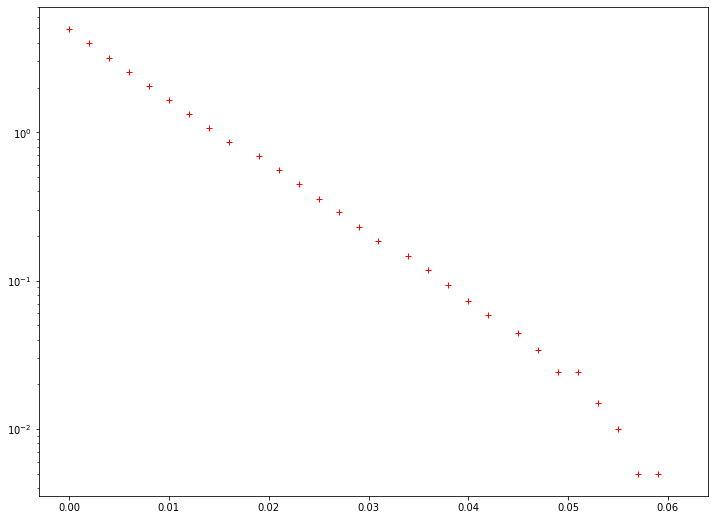

In [5]:
plt.semilogy(t,U,"r+")
plt.show()

In [6]:
gissning = [5,1e-4]
optimParams, pcov = opt.curve_fit(modellfunktion, t, U, p0=gissning, method="trf", verbose=2)
print("U_0 = {}    tau = {}".format(optimParams[0],optimParams[1]))

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2104e+01                                    2.40e-02    
       1              6         1.9567e+00      2.01e+01       1.95e-02       9.19e+02    
       2              7         1.4500e-02      1.94e+00       3.91e-02       6.45e+01    
       3              8         7.8737e-03      6.63e-03       1.22e-02       1.69e+00    
       4              9         7.8687e-03      5.06e-06       7.10e-04       3.23e-02    
       5             10         7.8687e-03      2.71e-09       3.43e-05       7.87e-04    
       6             11         7.8687e-03      1.52e-12       8.64e-07       1.94e-05    
`ftol` termination condition is satisfied.
Function evaluations 11, initial cost 2.2104e+01, final cost 7.8687e-03, first-order optimality 1.94e-05.
U_0 = 4.933495706582383    tau = 0.009234558213212132


Text(0, 0.5, 'spänning över kondensatorn $U_C\\,\\,\\,[V]$')

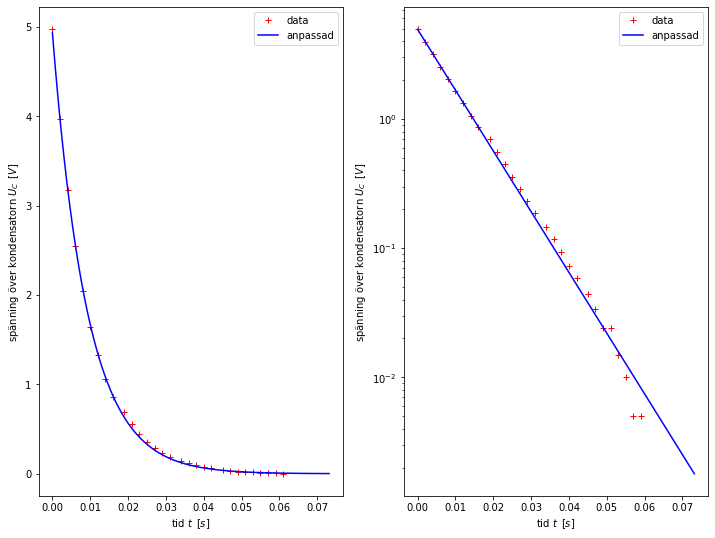

In [7]:
xvals = np.arange(min(t),1.2*max(t),max(t)/1200)
yvals = modellfunktion(xvals, *optimParams)

fig, ax = plt.subplots(ncols=2)
ax[0].plot(t, U, "r+", label="data")
ax[0].plot(xvals, yvals, "b-", label="anpassad")
ax[0].legend()
ax[0].set_xlabel(r"tid $t\,\,\,[s]$")
ax[0].set_ylabel(r"spänning över kondensatorn $U_C\,\,\,[V]$")
ax[1].semilogy(t, U, "r+", label="data")
ax[1].semilogy(xvals, yvals, "b-", label="anpassad")
ax[1].legend()
ax[1].set_xlabel(r"tid $t\,\,\,[s]$")
ax[1].set_ylabel(r"spänning över kondensatorn $U_C\,\,\,[V]$")